In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn import model_selection, preprocessing, linear_model, neighbors, ensemble, neural_network, metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, OrdinalEncoder
from copy import deepcopy
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics, model_selection
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

## Load Data

In [4]:
data_path = r'data/Loan/loan-10k.lrn.csv'
df = pd.read_csv(data_path)
df

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,A
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,E
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,D
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,C
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6644,20000.0,20000.0,20000.0,60 months,16.02,486.58,5 years,OWN,54000.0,...,N,8,2017,11,1991,2,2019,2,2019,C
9996,25910,7500.0,7500.0,7500.0,36 months,9.49,240.22,10+ years,RENT,46386.0,...,N,10,2014,4,2004,3,2017,6,2018,B
9997,95698,20750.0,20750.0,20750.0,60 months,15.05,494.19,< 1 year,RENT,185000.0,...,N,4,2017,2,2004,2,2019,2,2019,C
9998,27371,11000.0,11000.0,11000.0,60 months,16.29,269.20,1 year,RENT,38500.0,...,N,9,2014,8,2006,3,2016,10,2016,D


## 2. Exploration

In [5]:
df.describe()

,ID,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,total_bc_limit,total_il_high_credit_limit,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50043.430200,15631.152500,15631.152500,15625.992500,13.216959,461.084183,8.212897e+04,19.089188,0.303400,698.179500,...,2.423097e+04,48294.371800,5.77670,2016.003100,5.724600,2000.017900,4.003000,2017.747300,3.334200,2018.453400
std,28982.440166,9314.246117,9314.246117,9312.426843,4.855838,269.903751,6.769284e+04,9.523219,0.841201,32.170977,...,2.539548e+04,46981.179499,3.40482,1.587496,3.382558,7.302583,3.224257,1.463235,2.909666,0.963494
min,0.000000,1000.000000,1000.000000,1000.000000,5.310000,30.120000,5.000000e+03,0.000000,0.000000,660.000000,...,2.000000e+02,0.000000,0.00000,2012.000000,0.000000,1965.000000,0.000000,2012.000000,0.000000,2012.000000
25%,24873.250000,8350.000000,8350.000000,8343.750000,9.750000,263.770000,5.000000e+04,12.437500,0.000000,675.000000,...,8.800000e+03,18881.250000,3.00000,2015.000000,3.000000,1996.000000,2.000000,2017.000000,2.000000,2018.000000
50%,50033.500000,14000.000000,14000.000000,14000.000000,12.730000,396.780000,7.000000e+04,18.330000,0.000000,690.000000,...,1.710000e+04,36533.500000,6.00000,2016.000000,6.000000,2001.000000,2.000000,2018.000000,2.000000,2019.000000
75%,75261.500000,21000.000000,21000.000000,21000.000000,16.010000,616.337500,9.700000e+04,24.930000,0.000000,715.000000,...,3.140000e+04,63500.500000,9.00000,2017.000000,9.000000,2005.000000,6.000000,2019.000000,3.000000,2019.000000
max,99999.000000,40000.000000,40000.000000,40000.000000,30.990000,1717.630000,3.200000e+06,168.520000,16.000000,845.000000,...,1.090700e+06,768775.000000,11.00000,2018.000000,11.000000,2015.000000,11.000000,2019.000000,11.000000,2019.000000


Attribute 'policiy_code' always has the same value -> carries no information for training

In [6]:
display(df.policy_code.describe())
# df.drop("policy_code", axis=1, inplace=True)

count    10000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

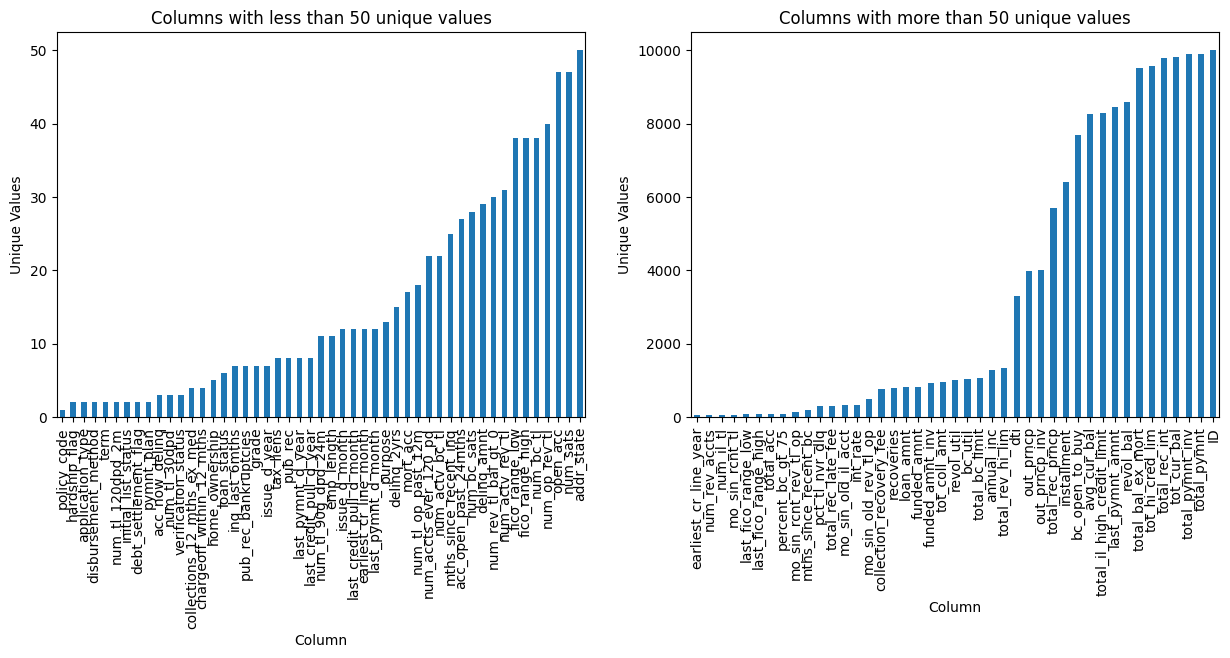

In [7]:
unique_values = df.nunique().sort_values()

less_than_50 = unique_values[unique_values <= 50]
more_than_50 = unique_values[unique_values > 50]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

less_than_50.plot(kind='bar', ax=ax1)
ax1.set_title('Columns with less than 50 unique values')

more_than_50.plot(kind='bar', ax=ax2)
ax2.set_title('Columns with more than 50 unique values')

for ax in [ax1, ax2]:
    ax.set_xlabel('Column')
    ax.set_ylabel('Unique Values')

plt.show()

Huge variance in count of unique values. Quite a few variables below 20 unique values, therefore quite a few categorical data attributes. Trying different encoding techniques might be usefull.

<Axes: >

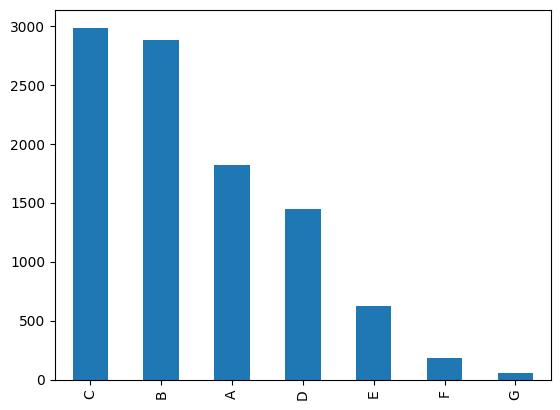

In [8]:
df['grade'].value_counts().plot(kind='bar')

Looking at the distribution of our target variable we can see that it is very imbalanced. F and G are almost not presented. 

In [9]:
df.select_dtypes(object)

,term,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,grade
0,36 months,< 1 year,MORTGAGE,Not Verified,Current,n,debt_consolidation,IL,w,Individual,N,Cash,N,A
1,60 months,1 year,MORTGAGE,Source Verified,Current,n,debt_consolidation,OK,f,Individual,N,Cash,N,E
2,60 months,< 1 year,RENT,Not Verified,Fully Paid,n,debt_consolidation,AZ,w,Individual,N,Cash,N,D
3,36 months,9 years,RENT,Source Verified,Charged Off,n,debt_consolidation,CA,f,Individual,N,Cash,N,C
4,36 months,1 year,MORTGAGE,Source Verified,Current,n,debt_consolidation,FL,w,Individual,N,Cash,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,60 months,5 years,OWN,Verified,Current,n,debt_consolidation,NJ,w,Individual,N,Cash,N,C
9996,36 months,10+ years,RENT,Source Verified,Charged Off,n,credit_card,NY,w,Individual,N,Cash,N,B
9997,60 months,< 1 year,RENT,Source Verified,Current,n,debt_consolidation,OR,w,Individual,N,Cash,N,C
9998,60 months,1 year,RENT,Source Verified,Charged Off,n,medical,CA,w,Individual,N,Cash,N,D


Looking at the columns of type object we can see that columns like 'emp_length' have some kind of order -> ordinal while most other columns are of nominal type. At the end of the dataset there are also 8 attributes with month and year values which i also consider ordinal.

In [10]:
log_features = ['int_rate', 'annual_inc', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit']
c_root_tranform_col = ['installment', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                                'total_il_high_credit_limit', 'total_bal_ex_mort', 'avg_cur_bal', 'bc_open_to_buy', 
                                'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt','tot_cur_bal']
columns_to_transform = log_features + c_root_tranform_col

df[columns_to_transform].hist(bins=30, figsize=(150,100))

array([[<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'total_rev_hi_lim'}>,
        <Axes: title={'center': 'tot_hi_cred_lim'}>],
       [<Axes: title={'center': 'total_bc_limit'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'total_pymnt'}>],
       [<Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_il_high_credit_limit'}>,
        <Axes: title={'center': 'total_bal_ex_mort'}>],
       [<Axes: title={'center': 'avg_cur_bal'}>,
        <Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'last_pymnt_amnt'}>,
        <Axes: title={'center': 'tot_coll_amt'}>,
        <Axes: title={'center': 'tot_cur_bal'}>, <Axes: >]], dtype=obje

Looking though the histograms of the data i observed that many of the variables have very skewed histograms and transforming them to have a more symmetric distribution might bring performance improvements down the line. Above are the Attributes i identified that might profit from a transformation, below are the histograms of the transformed attributes.

In [11]:
log_tranform_col = ['int_rate', 'annual_inc', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit']
c_root_tranform_col = ['installment', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                                'total_il_high_credit_limit', 'total_bal_ex_mort', 'avg_cur_bal', 'bc_open_to_buy', 
                                'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt','tot_cur_bal']
columns_to_transform = log_features + c_root_tranform_col

test = df.copy()


for col in c_root_tranform_col:
    test[col] = np.cbrt(test[col])
for col in log_tranform_col:
    test[col] = np.log(test[col])

test[columns_to_transform].hist(bins=30, figsize=(150,100))

array([[<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'total_rev_hi_lim'}>,
        <Axes: title={'center': 'tot_hi_cred_lim'}>],
       [<Axes: title={'center': 'total_bc_limit'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'total_pymnt'}>],
       [<Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_il_high_credit_limit'}>,
        <Axes: title={'center': 'total_bal_ex_mort'}>],
       [<Axes: title={'center': 'avg_cur_bal'}>,
        <Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'last_pymnt_amnt'}>,
        <Axes: title={'center': 'tot_coll_amt'}>,
        <Axes: title={'center': 'tot_cur_bal'}>, <Axes: >]], dtype=obje

Looking at potential outliers i found a few features that could be of interest. Especially the attribute int_rate has some outliers at the value 6 while grouping the grades very nicely. Later on it can be seen that in the decision Tree this attribute is the most important one but removing the outliers did not improve the performance. 

<Axes: xlabel='int_rate', ylabel='grade'>

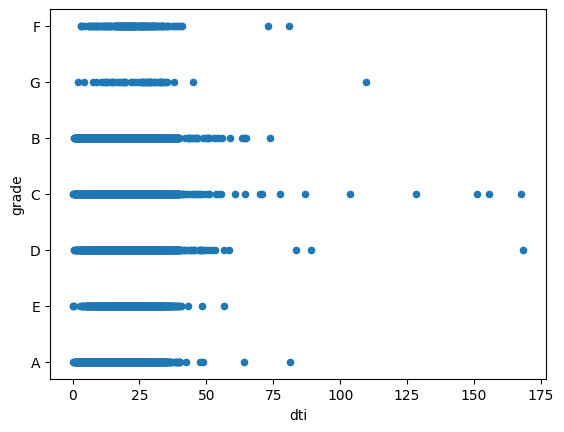

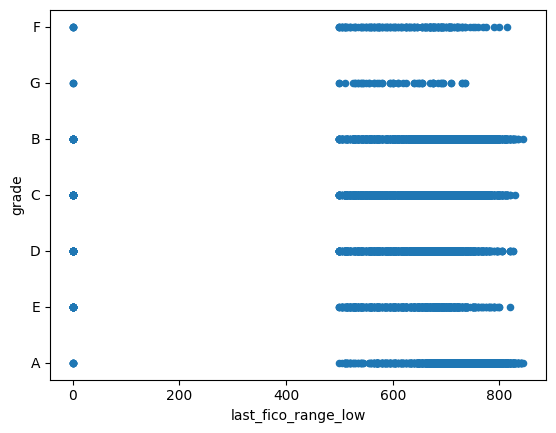

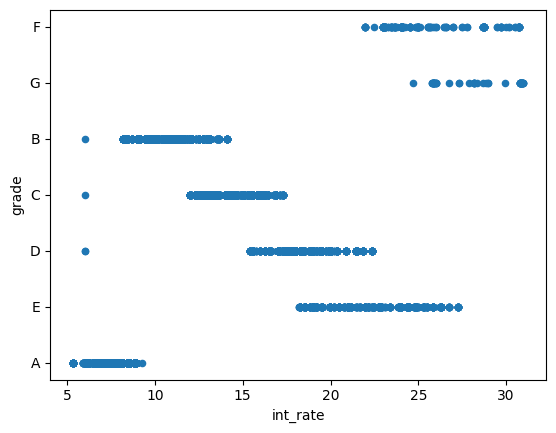

In [12]:
#dti, last_fico_range_low have outliers but dont seem to be relevant features

df.plot.scatter(x='dti', y ='grade')
df.plot.scatter(x='last_fico_range_low', y ='grade')
df.plot.scatter(x='int_rate', y ='grade')

There are no missing values in the dataset

In [13]:
df.isna().any().any()

False

## Experiments

The function train_test splits the data into train test set and drops the ID column because it is not supposed to be used in the training. If data for the kaggle competition is used the data is not split because there is an extra test set available.

In [14]:
def train_test(X, y, kaggle):
    if kaggle:
        X_tr = X.copy()
        y_tr = y.copy()
        X_te = pd.read_csv('data/Loan/loan-10k.tes.csv')
        X_te_id = X_te.pop('ID')
        X_tr_id = X_tr.pop('ID')
        return X_tr, X_te, y_tr, None, X_te_id, X_tr_id
    else:
        X_tr, X_te, y_tr, y_te = train_test_split(X,y, random_state=40, stratify=y, test_size=0.2)
        X_te_id = X_te.pop('ID')
        X_tr_id = X_tr.pop('ID')
        return X_tr, X_te, y_tr, y_te, X_te_id, X_tr_id

For the encoding experiments i have three cases:
- label encoding
- 1-hot encoding
- mix where i use label encoding for attributes i think have an obvious order (emp_length, loan_status) and 1-hot for everything else

I only use the data from the training set not from the test set for encoding. This means that unseen categories in in the testset are encoded to -1 in the case of label encoding and are ignored in the case of one-hot encoding. In the 'mix' encoding i also decided to drop the attribute 'addr_state' because it adds 50 extra columns with information that does not seem to be of much value. 

In [15]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, OrdinalEncoder

def encode_data(X_tr, X_te, how):
    col = list(X_tr.select_dtypes('object').columns)
    if how == 'label':
        enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        X_tr[col] = enc.fit_transform(X_tr[col])
        X_te[col] = enc.transform(X_te[col])
    if how =='one_hot':
        enc = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='error')
        encoded_array = enc.fit_transform(X_tr.loc[:,col])
        X_tr_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
        X_tr = X_tr.assign(row_number=range(len(X_tr)))
        X_tr_encoded = X_tr_encoded.assign(row_number=range(len(X_tr_encoded)))
        X_tr_sklearn_encoded = pd.merge(X_tr, X_tr_encoded, on='row_number')
        X_tr_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_tr = X_tr_sklearn_encoded

        encoded_array = enc.transform(X_te.loc[:,col])
        X_te_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out())
        X_te = X_te.assign(row_number=range(len(X_te)))
        X_te_encoded = X_te_encoded.assign(row_number=range(len(X_te_encoded)))
        X_te_sklearn_encoded = pd.merge(X_te, X_te_encoded, on='row_number')
        X_te_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_te = X_te_sklearn_encoded
    if how == 'mix':
        for x in [X_tr, X_te]:
            x['emp_length'].replace({ '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,    
                '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}, inplace=True)
            x['loan_status'].replace({'Charged Off': 0, 'Current': 1,'Fully Paid': 2, 'In Grace Period': 3,  
                'Late (16-30 days)': 4, 'Late (31-120 days)': 5, 'Default': -1}, inplace=True)
            x.drop(labels=['addr_state'], axis=1, inplace=True)
        col = list(X_tr.select_dtypes('object').columns)

        enc = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')
        encoded_array = enc.fit_transform(X_tr.loc[:,col])
        X_tr_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
        X_tr = X_tr.assign(row_number=range(len(X_tr)))
        X_tr_encoded = X_tr_encoded.assign(row_number=range(len(X_tr_encoded)))
        X_tr_sklearn_encoded = pd.merge(X_tr, X_tr_encoded, on='row_number')
        X_tr_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_tr = X_tr_sklearn_encoded

        encoded_array = enc.transform(X_te.loc[:,col])
        X_te_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out())
        X_te = X_te.assign(row_number=range(len(X_te)))
        X_te_encoded = X_te_encoded.assign(row_number=range(len(X_te_encoded)))
        X_te_sklearn_encoded = pd.merge(X_te, X_te_encoded, on='row_number')
        X_te_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_te = X_te_sklearn_encoded
    return X_tr, X_te

In the 'tranformer' function the previosly identified skewed attributes are being tranformed to be more symmetrical.

In [16]:
def transformer(X_tr, X_te):
        log_tranform_col = ['int_rate', 'annual_inc', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit']
        c_root_tranform_col = ['installment', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                            'total_il_high_credit_limit', 'total_bal_ex_mort', 'avg_cur_bal', 'bc_open_to_buy', 
                            'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt','tot_cur_bal']

        for col in c_root_tranform_col:
            X_tr[col] = np.cbrt(X_tr[col])
            X_te[col] = np.cbrt(X_te[col])
        for col in log_tranform_col:
            X_tr[col] = np.log(X_tr[col])
            X_te[col] = np.log(X_te[col])
        return X_tr, X_te

Here a pipeline is created with a scaler (Standard scaler) an oversampler(Random oversampler) and three classification methods: KNN, DecisionTree and MLP. 
There are a few options to define what the pipeline does:
- kaggle: if the kaggle test set should be predicted
- encoding: 'one_hot', 'label', 'mix' what king of encoding to use
- scaling: if scaling should be used
- oversampling: if oversampling should be used (minority attributes are beeing overscaled)
- transform: if log/root transformations should be applied
- rm_outlier: if the outlier in int_rate should be removed
- do_holdout: if holdout or cv should be used, if False cv=5 is used

for performance metrics the confusion matrix, precision, recall and fscore are looked at.

In [24]:
kaggle = False
encoding = 'label'
scaling = True
oversampling = True
transform = True
rm_outlier = False

data = df.copy()

if rm_outlier:
    data = data[data.int_rate != 6.0]

y = data.pop('grade')
X = data

X_tr, X_te, y_tr, y_te, X_te_id, X_tr_id = train_test(X, y, False)

if transform:
    X_tr, X_te = transformer(X_tr, X_te)
X_tr, X_te = encode_data(X_tr, X_te, encoding)

preprocessing_steps = []
if scaling:
    scaler = preprocessing.StandardScaler()
    preprocessing_steps.append(('standard_scaling', scaler))

if oversampling:
    ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
    preprocessing_steps.append(('random_sampler', ros))

methods = [ 
    ('KNN', neighbors.KNeighborsClassifier()), 
    ('DT', DecisionTreeClassifier()),
    ('MLP', neural_network.MLPClassifier())]

methods = [ 
    ('KNN', neighbors.KNeighborsClassifier()), 
    ('DT', DecisionTreeClassifier()),#],#,#, #criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2
    ('MLP', neural_network.MLPClassifier(activation= 'relu', alpha= 0.0001,hidden_layer_sizes= (20, 20), learning_rate= 'adaptive', max_iter= 500, solver= 'adam'))]

pipelines = {}
for method in methods:
    pipeline_steps = deepcopy(preprocessing_steps)
    pipeline_steps.append(method)
    pipeline = Pipeline(pipeline_steps)
    name, cl = method
    pipelines[name] = pipeline
scores = []

do_holdout = False

for pipeline in pipelines.values():
    pipeline
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    scores = [
        metrics.confusion_matrix(y_te, y_pred), 
        metrics.precision_recall_fscore_support(y_te, y_pred, average='macro'),
        metrics.accuracy_score(y_te, y_pred)]
    for score in scores:
        display(score)


array([[262,  84,  16,   2,   0,   0,   0],
       [153, 294, 122,   5,   2,   0,   0],
       [ 47, 221, 270,  57,   3,   0,   0],
       [  5,  72, 158,  43,  10,   2,   0],
       [  2,  23,  59,  35,   1,   3,   1],
       [  0,   3,  16,  13,   5,   0,   0],
       [  0,   1,   6,   2,   2,   0,   0]])

(0.24493044409223072, 0.26257746876675603, 0.2471891714486464, None)

0.435

array([[362,   2,   0,   0,   0,   0,   0],
       [  2, 571,   3,   0,   0,   0,   0],
       [  1,   2, 594,   1,   0,   0,   0],
       [  0,   0,   2, 285,   3,   0,   0],
       [  0,   0,   0,   4, 118,   2,   0],
       [  0,   0,   0,   0,   2,  32,   3],
       [  0,   0,   0,   0,   0,   1,  10]])

(0.943157393210248, 0.9553518962300674, 0.9483213764036422, None)

0.986

array([[334,  30,   0,   0,   0,   0,   0],
       [ 23, 539,  13,   1,   0,   0,   0],
       [  1,  21, 553,  23,   0,   0,   0],
       [  0,   0,  31, 245,  12,   1,   1],
       [  0,   0,   0,  27,  88,   9,   0],
       [  0,   0,   0,   0,  13,  21,   3],
       [  0,   0,   0,   0,   0,   6,   5]])

(0.7860578944450446, 0.7649590711465232, 0.7745171637710504, None)

0.8925

In [18]:
def eval(y_pred, y_test):
    model = {}
    cm = metrics.confusion_matrix(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
    prfs = metrics.precision_recall_fscore_support(y_test, y_pred)
    prfs_macro = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')

    display(cm)
    print(f'acc: {acc}\nbalanced_acc: {balanced_acc}\nprfs: {prfs_macro}\n')

    model['y_pred'] = y_pred

    model['cm'] = cm
    model['acc'] = acc
    model['balanced_acc'] = balanced_acc
    model['prfs'] = prfs
    model['f1'] = prfs_macro
    return model


def perform_gridsearch(X_train, y_train, X_test, y_test, pipe, params, do_holdout=False):
    if do_holdout:
        display("doing holdout")
        X_tr, X_val, y_tr, y_val = model_selection.train_test_split(X_train, X_train, random_state=42, test_size=0.2)
        tr_val_split = y_train.copy()
        tr_val_split[:] = 0
        tr_val_split[X_tr.index.values] = -1
        cv = model_selection.PredefinedSplit(tr_val_split)
    else:
        cv = 5
        
    model = {}
    gr_search = model_selection.GridSearchCV(pipe, param_grid=params, scoring='f1_macro', cv=cv, verbose=2, n_jobs=3)
    gr_search.fit(X_train, y_train)
    best_params = gr_search.best_params_
    best_score = gr_search.best_score_
    refit_time = gr_search.refit_time_
    best_model = gr_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    display(best_params)
    display(refit_time)
    model = eval(y_pred, y_test)
    model['best_model'] = best_model
    model['best_params'] = best_params
    model['best_score'] = best_score

    return model

Down below the parameter grids are defined fro the gridsearch

In [19]:
models = {}

In [22]:
knn_params = {'KNN__n_neighbors': [1, 2, 3, 5, 7, 10, 20, 30, 40, 50, 100, 200, 300, 1000, 2000, 5000], 
              'KNN__weights': ['distance'],
              'KNN__p': [1, 2],
             }
models['KNN'] = perform_gridsearch(X_tr, y_tr, X_te, y_te, pipelines['KNN'], knn_params, do_holdout)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END KNN__n_neighbors=1, KNN__p=1, KNN__weights=distance; total time=   1.5s
[CV] END KNN__n_neighbors=1, KNN__p=1, KNN__weights=distance; total time=   1.5s
[CV] END KNN__n_neighbors=1, KNN__p=1, KNN__weights=distance; total time=   1.5s
[CV] END KNN__n_neighbors=1, KNN__p=2, KNN__weights=distance; total time=   0.3s
[CV] END KNN__n_neighbors=1, KNN__p=2, KNN__weights=distance; total time=   0.3s
[CV] END KNN__n_neighbors=1, KNN__p=2, KNN__weights=distance; total time=   0.3s
[CV] END KNN__n_neighbors=1, KNN__p=2, KNN__weights=distance; total time=   0.3s
[CV] END KNN__n_neighbors=1, KNN__p=1, KNN__weights=distance; total time=   1.3s
[CV] END KNN__n_neighbors=1, KNN__p=1, KNN__weights=distance; total time=   1.5s
[CV] END KNN__n_neighbors=1, KNN__p=2, KNN__weights=distance; total time=   0.3s
[CV] END KNN__n_neighbors=2, KNN__p=1, KNN__weights=distance; total time=   1.2s
[CV] END KNN__n_neighbors=2, KNN__p=1, KNN__wei

{'KNN__n_neighbors': 5000, 'KNN__p': 1, 'KNN__weights': 'distance'}

0.06060433387756348

array([[324,  36,   3,   1,   0,   0,   0],
       [229, 242,  90,   5,   2,   2,   6],
       [ 93, 109, 289,  56,  14,  11,  26],
       [ 15,  19,  99,  85,  30,  21,  21],
       [  5,   2,  16,  39,  24,  14,  24],
       [  0,   0,   1,   8,   7,   6,  15],
       [  0,   0,   0,   2,   4,   1,   4]])

acc: 0.487
balanced_acc: 0.40085381887759786
prfs: (0.36295319542437665, 0.40085381887759786, 0.3482157304229382, None)



In [23]:
mlp_params = {
    'MLP__hidden_layer_sizes': [(50, 10), (50, 50), (30, 30), (20, 20), (40, 10)],
    'MLP__activation': ['relu'],
    'MLP__solver': ['adam'],
    'MLP__alpha': [0.0001, 0.001],
    'MLP__learning_rate': ['adaptive'],
    'MLP__max_iter': [500]
}

models['MLP'] = perform_gridsearch(X_tr, y_tr, X_te, y_te, pipelines['MLP'], mlp_params, do_holdout)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END MLP__activation=relu, MLP__alpha=0.0001, MLP__hidden_layer_sizes=(50, 10), MLP__learning_rate=adaptive, MLP__max_iter=500, MLP__solver=adam; total time=  11.9s
[CV] END MLP__activation=relu, MLP__alpha=0.0001, MLP__hidden_layer_sizes=(50, 10), MLP__learning_rate=adaptive, MLP__max_iter=500, MLP__solver=adam; total time=  12.4s
[CV] END MLP__activation=relu, MLP__alpha=0.0001, MLP__hidden_layer_sizes=(50, 10), MLP__learning_rate=adaptive, MLP__max_iter=500, MLP__solver=adam; total time=  15.4s
[CV] END MLP__activation=relu, MLP__alpha=0.0001, MLP__hidden_layer_sizes=(50, 10), MLP__learning_rate=adaptive, MLP__max_iter=500, MLP__solver=adam; total time=  11.5s
[CV] END MLP__activation=relu, MLP__alpha=0.0001, MLP__hidden_layer_sizes=(50, 10), MLP__learning_rate=adaptive, MLP__max_iter=500, MLP__solver=adam; total time=  11.8s
[CV] END MLP__activation=relu, MLP__alpha=0.0001, MLP__hidden_layer_sizes=(50, 50), MLP__learn

{'MLP__activation': 'relu',
 'MLP__alpha': 0.0001,
 'MLP__hidden_layer_sizes': (20, 20),
 'MLP__learning_rate': 'adaptive',
 'MLP__max_iter': 500,
 'MLP__solver': 'adam'}

68.39259934425354

array([[329,  35,   0,   0,   0,   0,   0],
       [ 21, 534,  21,   0,   0,   0,   0],
       [  1,  17, 554,  26,   0,   0,   0],
       [  0,   0,  21, 249,  19,   1,   0],
       [  0,   0,   0,  25,  85,  14,   0],
       [  0,   0,   0,   0,  15,  21,   1],
       [  0,   0,   0,   0,   1,   9,   1]])

acc: 0.8865
balanced_acc: 0.7085617301373335
prfs: (0.7547307053284331, 0.7085617301373335, 0.7105983278409722, None)



In [25]:
DT_params = {
    'DT__max_depth': [None, 5, 10, 20, 50, 100],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [1, 2, 4]
}

models['DT'] = perform_gridsearch(X_tr, y_tr, X_te, y_te, pipelines['DT'], DT_params, do_holdout)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.2s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.2s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.3s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.2s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.2s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=5; total time=   0.2s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=5; total time=   0.2s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=5; total time=   0.2s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=5; total time=   0.1s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samp

{'DT__max_depth': 50, 'DT__min_samples_leaf': 2, 'DT__min_samples_split': 5}

0.1619253158569336

array([[362,   2,   0,   0,   0,   0,   0],
       [  2, 572,   2,   0,   0,   0,   0],
       [  1,   2, 595,   0,   0,   0,   0],
       [  0,   0,   3, 286,   1,   0,   0],
       [  0,   0,   0,   6, 116,   2,   0],
       [  0,   0,   0,   0,   3,  31,   3],
       [  0,   0,   0,   0,   0,   2,   9]])

acc: 0.9855
balanced_acc: 0.9371792501703065
prfs: (0.9369051501879291, 0.9371792501703065, 0.9366966281394529, None)



## Kaggle classification

In [36]:
if kaggle:

    encoding = 'label'
    scaling = True
    oversampling = False
    transform = True
    rm_outlier = False

    X_tr, X_te, y_tr, y_te, X_te_id, X_tr_id = train_test(X, y, True)

    X_tr, X_te = transformer(X_tr, X_te)
    X_tr, X_te = encode_data(X_tr, X_te, encoding)

    preprocessing_steps = []
    if scaling:
        scaler = preprocessing.StandardScaler()
        preprocessing_steps.append(('standard_scaling', scaler))

    if oversampling:
        ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
        preprocessing_steps.append(('random_sampler', ros))

    methods = [('DT', DecisionTreeClassifier(max_depth= 100, min_samples_leaf= 1, min_samples_split=2))]

    pipelines = {}
    for method in methods:
        pipeline_steps = deepcopy(preprocessing_steps)
        pipeline_steps.append(method)
        pipeline = Pipeline(pipeline_steps)
        name, cl = method
        pipelines[name] = pipeline
    scores = []

    pipelines['DT'].fit(X_tr, y_tr)
    y_pred = pipelines['DT'].predict(X_te)
    fin = pd.concat([X_te_id, pd.Series(y_pred)], axis= 1)
    fin = fin.rename(mapper={0:'grade'}, axis=1)
    fin.to_csv('out.csv', index=False)

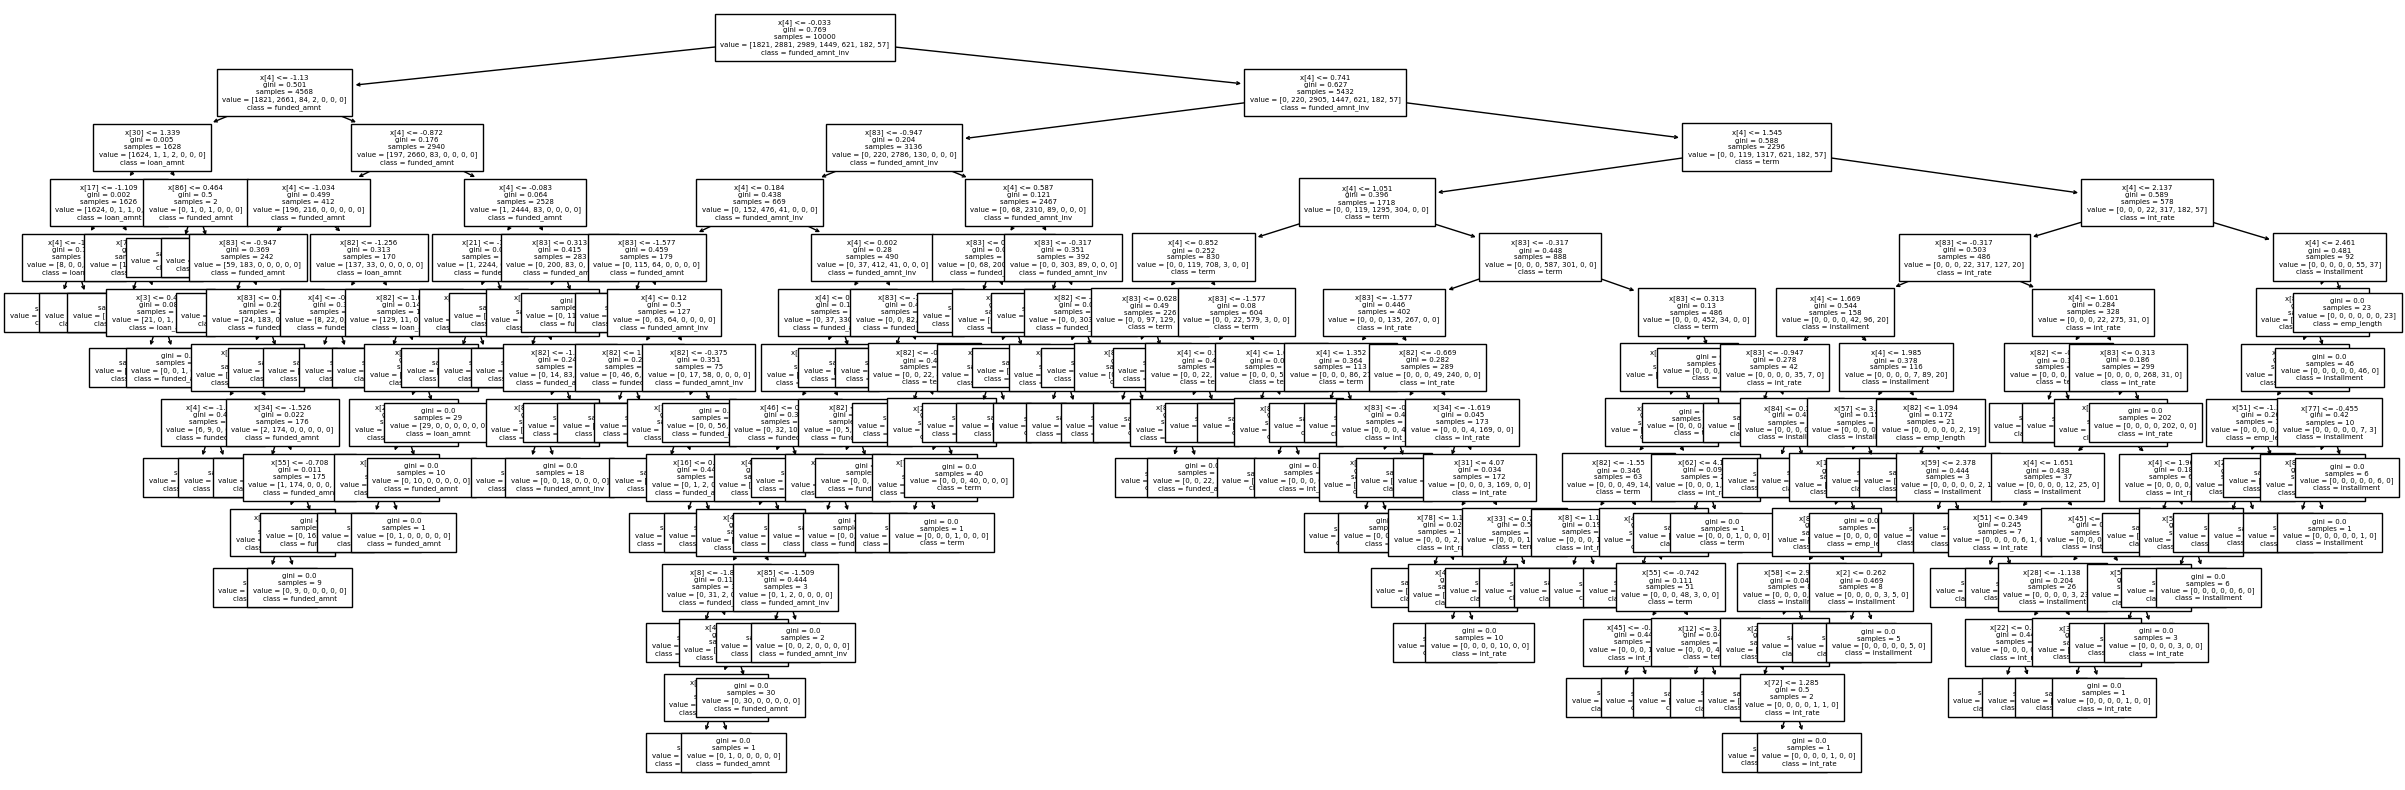

In [38]:
from sklearn.tree import plot_tree


plt.figure(figsize=(30,10))  # set plot size (denoted in inches)
plot_tree(pipelines['DT']['DT'], fontsize=5, class_names=list(X_tr.columns))
plt.show()
